# **House sale prices**

## Objectives

* Train a machine learning model to predict house prices.
* Use the prepared and transformed data created in previous steps (DataCollection, DataCleaning, and FeatureEngineering).
* Optimize hyperparameters to improve the model’s performance.

## Inputs

* Dataset with house prices that has gone through **data preparation** and **feature engineering** (`HousePricesCleaned.csv`, `HousePricesFeatures.csv`).
* Libraries for machine learning and data handling, including:
  - `pandas` for data manipulation.
  - `sklearn` for machine learning and model training.
  - `matplotlib` and `seaborn` for visualizations.

## Outputs

* Trained machine learning model.
* Predictions made on test data and an evaluation of how well the model performed.
* Visuals showing the model's predictions and errors.
* Saved predictions or the trained model for future use.

___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [5]:
import pandas as pd
df = pd.read_csv("jupyter_notebooks/outputs/datasets/collection/HousePricesFeatures.csv")
print(df.head())
print(df.info())
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

   2ndFlrSF  BedroomAbvGr  BsmtFinSF1  GarageArea  GrLivArea  BsmtExposure_Av  \
0  1.213595      0.153895    0.575425    0.351000   0.370333                0   
1 -0.756746      0.153895    1.171992   -0.060731  -0.482512                0   
2  1.241281      0.153895    0.092907    0.631726   0.515013                0   
3 -0.756746      0.153895   -0.499274    0.790804   0.383659                0   
4 -0.756746      1.416182    0.463568    1.698485   1.299326                1   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtFinType1_ALQ  ...  \
0                0                0                1                 0  ...   
1                1                0                0                 1  ...   
2                0                1                0                 0  ...   
3                0                0                1                 1  ...   
4                0                0                0                 0  ...   

   BsmtFinType1_Rec  BsmtFinType1_Unf 

Define features and target variable

In [6]:
# Define features (X) and target (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


Split Data into Training and Testing Sets

In [7]:
# Split the data. 70% for training and 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Create a machine learning pipeline

In [8]:
# Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('model', RandomForestRegressor(random_state=42))  # Model to train
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

Make predictions and evaluate model

In [9]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1067510729.5240638
R² Score: 0.8470197211307793


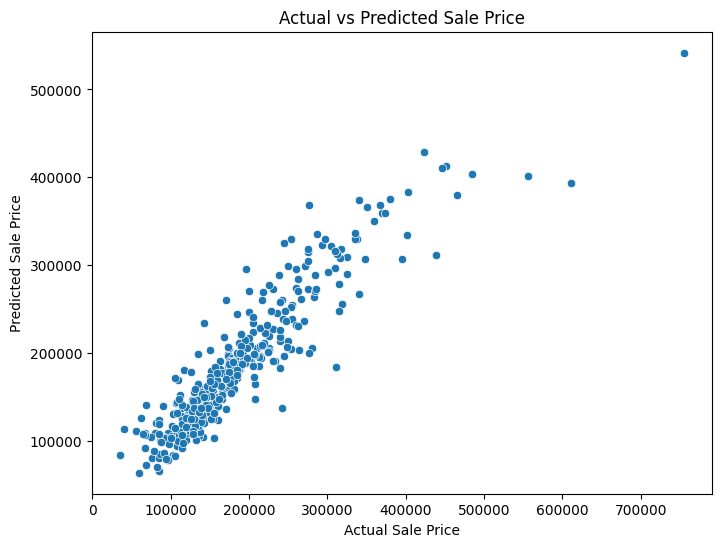

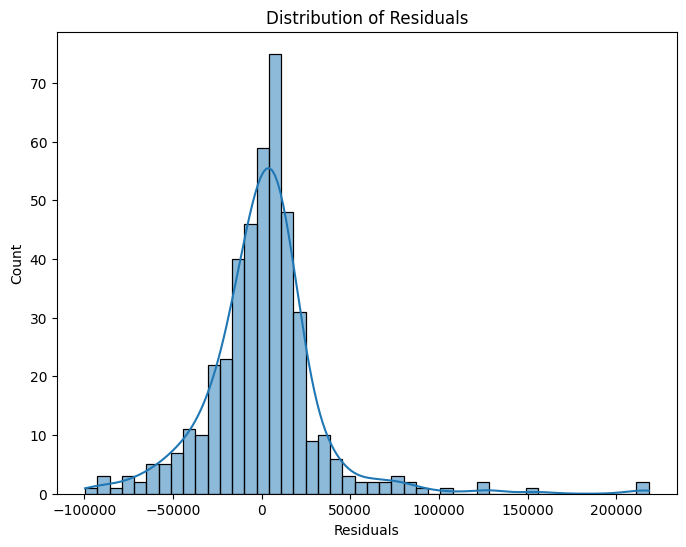

In [16]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()






Performs grid search, optimizes model, evaluates with MSE and R2 score.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameters for grid search
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create and fit the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found and evaluate the model
print(f"Best hyperparameters: {grid_search.best_params_}")
y_pred_optimized = grid_search.best_estimator_.predict(X_test)

# Evaluate and print results
print(f"Optimized MSE: {mean_squared_error(y_test, y_pred_optimized)}")
print(f"Optimized R² Score: {r2_score(y_test, y_pred_optimized)}")



Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   2.6s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   2.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   2.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   2.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   2.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   1.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split

Compares predicted and actual values, shows residuals after optimization.

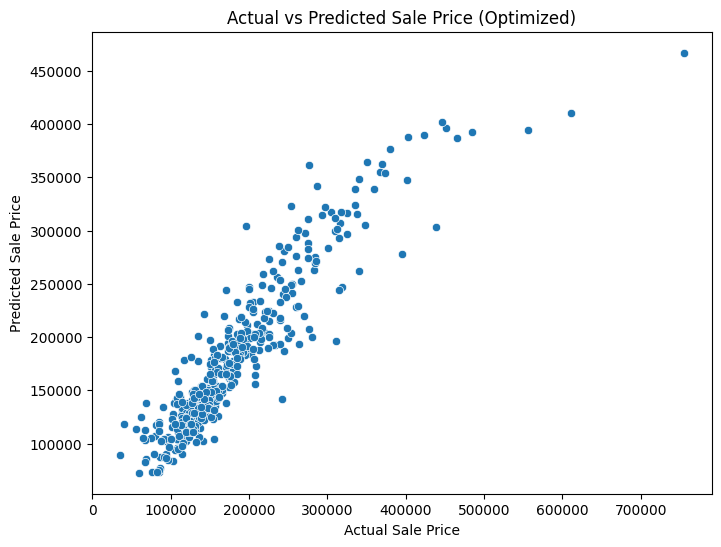

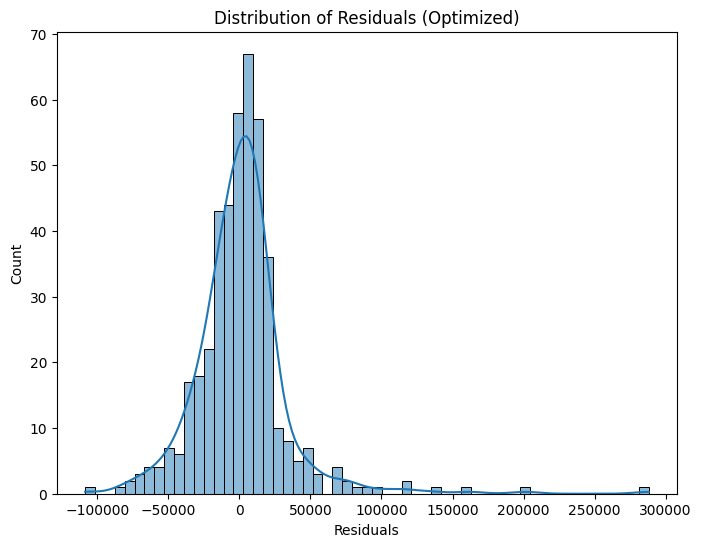

In [15]:
# Plot predicted vs actual values after optimization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_optimized)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price (Optimized)")
plt.show()

# Residual plot after optimization
residuals_optimized = y_test - y_pred_optimized
plt.figure(figsize=(8, 6))
sns.histplot(residuals_optimized, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Optimized)")
plt.show()

